In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import re
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.stats
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#загрузка данных
df_original = pd.read_csv('heart.csv')


Цель кейса №1 по данным о наличие сердечных заболеваний: провести полноценный анализ данных одного из реальных источников данных, используя Python и соответствующие библиотеки для анализа данных.

In [3]:
#!!! создадим рабочую копию исходного датафрейм для последующего преобразования, чтобы не "трогать" первоначальные данные.
df=df_original

In [4]:
#кол-во строк и столбцов таблицы 
df.shape

(918, 12)

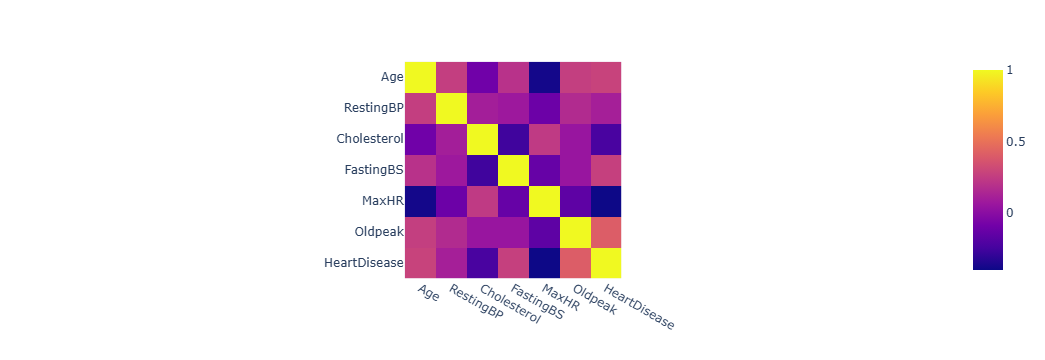

In [5]:
import pandas as pd
import plotly.express as px

# вычисление корреляций
corr_matrix = df.corr(numeric_only=True)

# визуализация корреляционной матрицы
fig = px.imshow(corr_matrix)
fig.show()

In [6]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [7]:
#зададим наименования столбцов таблицы
cols = df.columns
for i in range(len(cols)):
  print(cols[i])

Age
Sex
ChestPainType
RestingBP
Cholesterol
FastingBS
RestingECG
MaxHR
ExerciseAngina
Oldpeak
ST_Slope
HeartDisease


In [8]:
# Исследуем распределения по данным: 
# Рассчитываем кол-во уникальных значений, нулевых и пустых значений + доля в % от общего кол-ва;

# Для каждого столбца выведем: количество уникальных значений, нулевых, NaNs и их долю, а также тип данных в столбцах.

In [8]:
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data = []
for column in df:
    data.append([column] + columnValues(df[column]))

print(tabulate(data, headers=['название', 'к-во уник знач', 'к-во 0-ых знач', 'пустые','% пустых', 'тип данн'], tablefmt='orgtbl'))

| название       |   к-во уник знач |   к-во 0-ых знач |   пустые |   % пустых | тип данн   |
|----------------+------------------+------------------+----------+------------+------------|
| Age            |               50 |                0 |        0 |          0 | int64      |
| Sex            |                2 |                0 |        0 |          0 | object     |
| ChestPainType  |                4 |                0 |        0 |          0 | object     |
| RestingBP      |               67 |                1 |        0 |          0 | int64      |
| Cholesterol    |              222 |              172 |        0 |          0 | int64      |
| FastingBS      |                2 |              704 |        0 |          0 | int64      |
| RestingECG     |                3 |                0 |        0 |          0 | object     |
| MaxHR          |              119 |                0 |        0 |          0 | int64      |
| ExerciseAngina |                2 |                0 |    

In [12]:
# Age - возраст
# Sex - пол
# ChestPainType - Тип боли в груди [TA: Типичная стенокардия,ATA: Атипичная стенокардия, NAP: Нетипичная
# стенокардия, ASY: Бессимптомная]

# RestingBP - кровяное давление в состоянии покоя [мм рт. ст.]    
# Cholesterol - холестерин в сыворотке крови [мм/дл]
# FastingBS - уровень сахара в крови натощак [1: если уровень сахара в крови > 120 мг/дл, 0: в противном случае]
# RestingECG  результаты электрокардиограммы в состоянии покоя [Нормальный: Нормальный, ST: аномалия зубца ST-T (инверсии 
# зубца T и/или подъем или понижение ST > 0,05 мВ), ГЛЖ: показывает вероятную или определенную гипертрофию
# левого желудочка по критериям Эстеса]   

# MaxHR (Max Heart Rate) - максимальная достигнутая частота сердечных сокращений [Числовое значение от 60 до 202]
# ExerciseAngina - стенокардия, в нагрузке [Y: Да, N: Нет]
# Oldpeak - депрессия ST относится к обнаружению на электрокардиограмме, при котором след в сегменте ST 
# аномально низок ниже базовой линии.

# ST_Slope - максимальная нагрузка ST [Вверх: наклон вверх, Плоский: плоский, вниз: наклон вниз
# HeartDisease - наличие сердечных заболеваний [1: сердечные заболевания, 0: норма]

In [9]:
#кол-во строк и столбцов таблицы 
df.shape

(918, 12)

In [10]:
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data = []
for column in df:
    data.append([column] + columnValues(df[column]))

print(tabulate(data, headers=['название', 'к-во уник знач', 'к-во 0-ых знач', 'пустые','% пустых', 'тип данн'], tablefmt='orgtbl'))

| название       |   к-во уник знач |   к-во 0-ых знач |   пустые |   % пустых | тип данн   |
|----------------+------------------+------------------+----------+------------+------------|
| Age            |               50 |                0 |        0 |          0 | int64      |
| Sex            |                2 |                0 |        0 |          0 | object     |
| ChestPainType  |                4 |                0 |        0 |          0 | object     |
| RestingBP      |               67 |                1 |        0 |          0 | int64      |
| Cholesterol    |              222 |              172 |        0 |          0 | int64      |
| FastingBS      |                2 |              704 |        0 |          0 | int64      |
| RestingECG     |                3 |                0 |        0 |          0 | object     |
| MaxHR          |              119 |                0 |        0 |          0 | int64      |
| ExerciseAngina |                2 |                0 |    

In [11]:
num_rows = len(df)
num_columns = len(df.columns)
print("Количество строк:", num_rows)
print("Количество столбцов:", num_columns)

# b. Размер DataFrame в оперативной памяти
memory_usage = df.memory_usage().sum()
print("Размер DataFrame в памяти:", memory_usage, "байт")

# c. Анализ интервальных переменных
numerical_columns = df.select_dtypes(include=[int, float]).columns
for column in numerical_columns:
    print("Статистика для столбца", column)
    print ("стандартное отклонение", df[column].std())
    print("Минимальное значение:", df[column].min())
    print("Медиана:", df[column].median())
    print("Среднее значение:", df[column].mean())
    print("Максимальное значение:", df[column].max())
    print("10-й персентиль:", df[column].quantile(0.1))
    print("25-й персентиль:", df[column].quantile(0.25))
    print("75-й персентиль:", df[column].quantile(0.75))
    print("90-й персентиль:", df[column].quantile(0.9))
    print("----------------------------------------------")

# d. Анализ категориальных переменных
categorical_columns = df.select_dtypes(include=[object]).columns
for column in categorical_columns:
    print("Статистика для столбца", column)
    mode = df[column].mode()[0]
    mode_count = df[column].value_counts()[mode]
    unique_values = df[column].nunique()
    print("Мода:", mode)
    print("Количество встреч моды:", mode_count)
    print("Уникальные значения:", unique_values)



Количество строк: 918
Количество столбцов: 12
Размер DataFrame в памяти: 88260 байт
Статистика для столбца Age
стандартное отклонение 9.43261650673201
Минимальное значение: 28
Медиана: 54.0
Среднее значение: 53.510893246187365
Максимальное значение: 77
10-й персентиль: 40.0
25-й персентиль: 47.0
75-й персентиль: 60.0
90-й персентиль: 65.0
----------------------------------------------
Статистика для столбца RestingBP
стандартное отклонение 18.5141541199078
Минимальное значение: 0
Медиана: 130.0
Среднее значение: 132.39651416122004
Максимальное значение: 200
10-й персентиль: 110.0
25-й персентиль: 120.0
75-й персентиль: 140.0
90-й персентиль: 160.0
----------------------------------------------
Статистика для столбца Cholesterol
стандартное отклонение 109.38414455220348
Минимальное значение: 0
Медиана: 223.0
Среднее значение: 198.7995642701525
Максимальное значение: 603
10-й персентиль: 0.0
25-й персентиль: 173.25
75-й персентиль: 267.0
90-й персентиль: 305.0
---------------------------

In [12]:
# второй метод describe() возвращает сводную статистическую информацию о числовых столбцах в DataFrame, 

df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
#  FastingBS показатель уровня сахара в крови (1 знач высокий)
df.groupby('FastingBS').count().head(10)      

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
FastingBS,,,,,,,,,,,
0,704,704,704,704,704,704,704,704,704,704,704
1,214,214,214,214,214,214,214,214,214,214,214


In [14]:
df.groupby('Age').count().head(10)

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,,,,,,,,,,,
28,1,1,1,1,1,1,1,1,1,1,1
29,3,3,3,3,3,3,3,3,3,3,3
30,1,1,1,1,1,1,1,1,1,1,1
31,2,2,2,2,2,2,2,2,2,2,2
32,5,5,5,5,5,5,5,5,5,5,5
33,2,2,2,2,2,2,2,2,2,2,2
34,7,7,7,7,7,7,7,7,7,7,7
35,11,11,11,11,11,11,11,11,11,11,11
36,6,6,6,6,6,6,6,6,6,6,6


In [15]:
# найдем среднее значение
df.groupby('Age')['Age'].mean().head()

Age
28    28.0
29    29.0
30    30.0
31    31.0
32    32.0
Name: Age, dtype: float64

In [16]:
df.groupby('Sex').count().head(10)

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Sex,,,,,,,,,,,
F,193,193,193,193,193,193,193,193,193,193,193
M,725,725,725,725,725,725,725,725,725,725,725


In [17]:
df.groupby('Cholesterol').count().head(100) 


,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Cholesterol,,,,,,,,,,,
0,172,172,172,172,172,172,172,172,172,172,172
85,1,1,1,1,1,1,1,1,1,1,1
100,2,2,2,2,2,2,2,2,2,2,2
110,1,1,1,1,1,1,1,1,1,1,1
113,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
237,6,6,6,6,6,6,6,6,6,6,6
238,4,4,4,4,4,4,4,4,4,4,4
239,4,4,4,4,4,4,4,4,4,4,4


In [18]:
 # Посмотрим, сколько экземпляров каждого класса в датасете
import pandas as pd
# метод info()
print(df.info())

# метод columns()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [19]:
# Посмотрим зависимость пола по возрастным категориям, чтобы понять % соотношение М и Ж по возрасту
grouped = df.groupby(['Age', 'Sex']).size()
# Затем преобразуем полученные данные в процентное соотношение:
percentages = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# Результат можно вывести на экран:
print(percentages)

Age  Age  Sex
28   28   M      100.000000
29   29   M      100.000000
30   30   F      100.000000
31   31   F       50.000000
          M       50.000000
                    ...    
74   74   M       85.714286
75   75   M      100.000000
76   76   F       50.000000
          M       50.000000
77   77   M      100.000000
Length: 91, dtype: float64


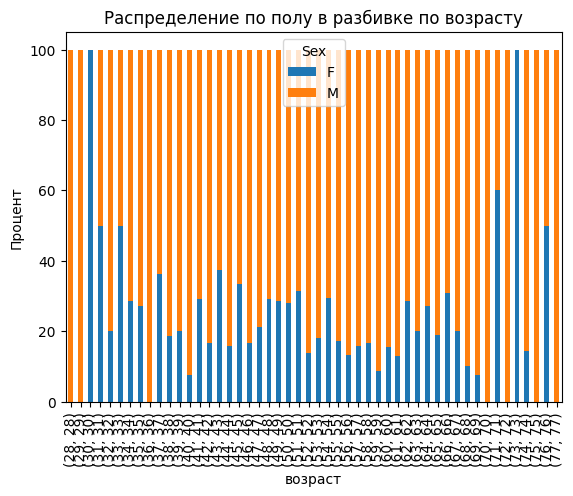

In [20]:
# Преобразуем таблицу в график
formatted = percentages.unstack() # переформатируем таблицу, чтобы индексом был возраст, а столбцами - пол:
formatted.plot(kind='bar', stacked=True)
plt.xlabel('возраст')
plt.ylabel('Процент')
plt.title('Распределение по полу в разбивке по возрасту')
plt.show()

In [21]:
# Выясним зависимость пола от стенокардии (Exercise Angina), чтобы понять % соотношение у М и Ж 
grouped = df.groupby(['Sex', 'ExerciseAngina']).size()
# Затем преоьразуем полученные данные в процентное соотношение:
percentages = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# Результат можно выводим на экран:
print(percentages)

Sex  Sex  ExerciseAngina
F    F    N                 77.720207
          Y                 22.279793
M    M    N                 54.758621
          Y                 45.241379
dtype: float64


In [22]:
# Преобразуем таблицу в график
def draw_data(data, xlabel, ylabel, title):
    formatted = data.unstack() # переформатируем таблицу, чтобы индексом был пол, а столбцами - %:
    formatted.plot(kind='bar', stacked=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

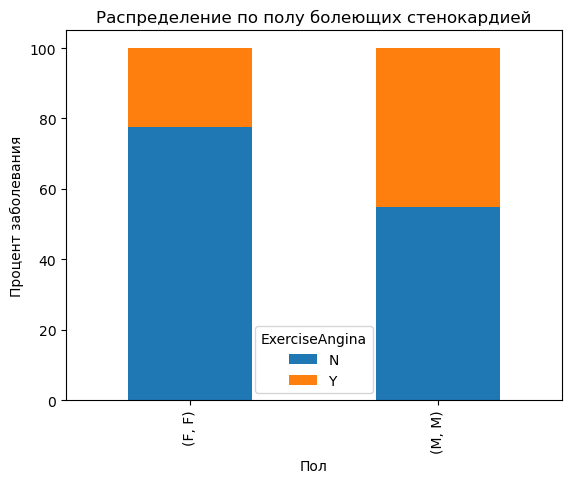

In [33]:
draw_data(percentages, 'Пол', 'Процент заболевания', 'Распределение по полу болеющих стенокардией')

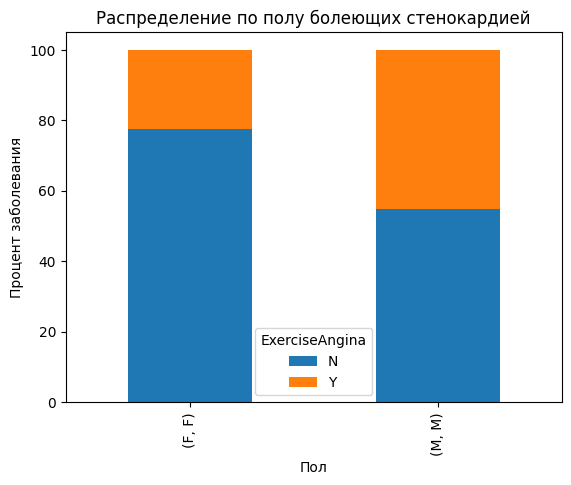

In [23]:
#Преобразуем таблицу в график
formatted = percentages.unstack() # переформатируем таблицу, чтобы индексом был пол, а столбцами - %:
formatted.plot(kind='bar', stacked=True)
plt.xlabel('Пол')
plt.ylabel('Процент заболевания')
plt.title('Распределение по полу болеющих стенокардией')
plt.show()

In [24]:
# Посмотрим зависимость пола от болезни сердца (HeartDisease), чтобы понять % соотношение у М и Ж 
grouped = df.groupby(['Sex', 'HeartDisease']).size()
# Затем преобразуем данные в процентное соотношение:
percentages = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# Результат выводим на экран:
print(percentages)

Sex  Sex  HeartDisease
F    F    0               74.093264
          1               25.906736
M    M    0               36.827586
          1               63.172414
dtype: float64


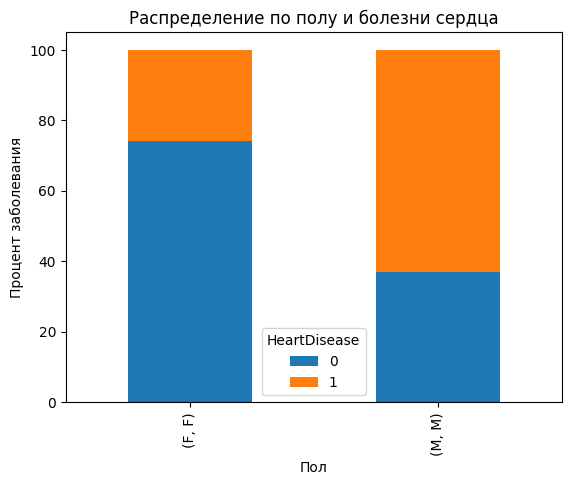

In [25]:
#Преобразуем таблицу в график
formatted = percentages.unstack() # переформатируем таблицу, чтобы индексом был возраст, а столбцами - пол:
formatted.plot(kind='bar', stacked=True)
plt.xlabel('Пол')
plt.ylabel('Процент заболевания')
plt.title('Распределение по полу и болезни сердца')
plt.show()

In [26]:
# Посмотрим зависимость возраста от болезни сердца (HeartDisease), чтобы понять % соотношение  
grouped = df.groupby(['Age', 'HeartDisease']).size()
# Затем преобразуем данные в процентное соотношение
percentages = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# Выведем результат на экран
print(percentages)

Age  Age  HeartDisease
28   28   0               100.000000
29   29   0               100.000000
30   30   0               100.000000
31   31   0                50.000000
          1                50.000000
                             ...    
75   75   0                33.333333
          1                66.666667
76   76   0                50.000000
          1                50.000000
77   77   1               100.000000
Length: 95, dtype: float64


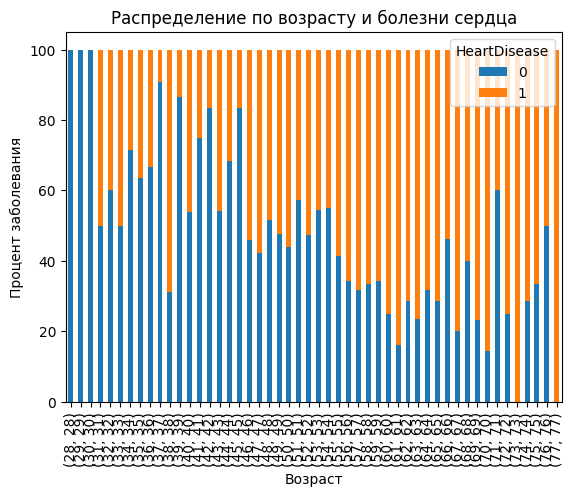

In [27]:
#Преобразуем таблицу в график
formatted = percentages.unstack() # переформатируем таблицу, чтобы индексом был возраст, а столбцами - %:
formatted.plot(kind='bar', stacked=True)
plt.xlabel('Возраст')
plt.ylabel('Процент заболевания')
plt.title('Распределение по возрасту и болезни сердца')
plt.show()

In [35]:
# Age - возраст
# Sex - пол
# ChestPainType - Тип боли в груди [TA: Типичная стенокардия,ATA: Атипичная стенокардия, NAP: Нетипичная
# стенокардия, ASY: Бессимптомная]
# RestingBP - кровяное давление в состоянии покоя [мм рт. ст.]    
# Cholesterol - холестерин в сыворотке крови [мм/дл]
# FastingBS - уровень сахара в крови натощак [1: если уровень сахара в крови > 120 мг/дл, 0: в противном случае]
# RestingECG  результаты электрокардиограммы в состоянии покоя [Нормальный: Нормальный, ST: аномалия зубца ST-T (инверсии 
# зубца T и/или подъем или понижение ST > 0,05 мВ), ГЛЖ: показывает вероятную или определенную гипертрофию
# левого желудочка по критериям Эстеса]         
# MaxHR (Max Heart Rate) - максимальная достигнутая частота сердечных сокращений [Числовое значение от 60 до 202]
# ExerciseAngina - стенокардия, в нагрузке [Y: Да, N: Нет]
# Oldpeak - депрессия ST относится к обнаружению на электрокардиограмме, при котором след в сегменте ST 
# аномально низок ниже базовой линии.
# ST_Slope - максимальная нагрузка ST [Вверх: наклон вверх, Плоский: плоский, вниз: наклон вниз
# HeartDisease - наличие сердечных заболеваний [1: сердечные заболевания, 0: норма]

<Axes: xlabel='HeartDisease', ylabel='count'>

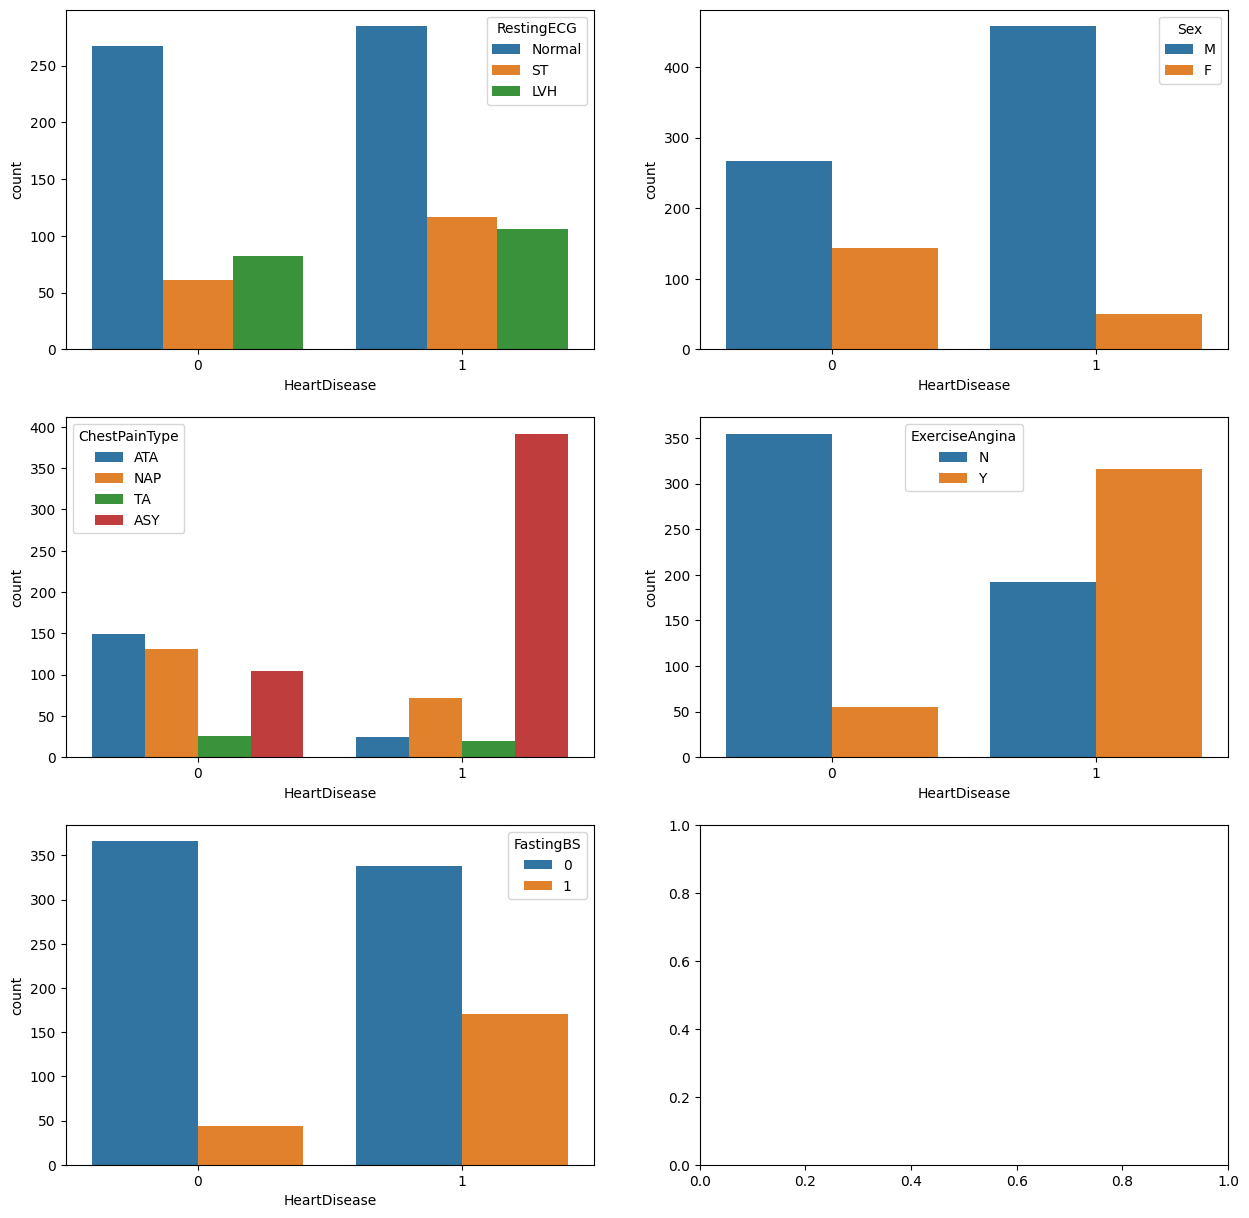

In [28]:

# распределение болезней сердца (HeartDisease) по ЭКГ,полу, грудной боли, стенокардии, сахара 
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
sns.countplot(x='HeartDisease', hue='RestingECG', data=df, ax=axes[0][0])
sns.countplot(x="HeartDisease", hue="Sex", data=df, ax=axes[0][1])
sns.countplot(x="HeartDisease", hue="ChestPainType", data=df, ax=axes[1][0])
sns.countplot(x="HeartDisease", hue="ExerciseAngina", data=df, ax=axes[1][1])
sns.countplot(x="HeartDisease", hue="FastingBS", data=df, ax=axes[2][0])

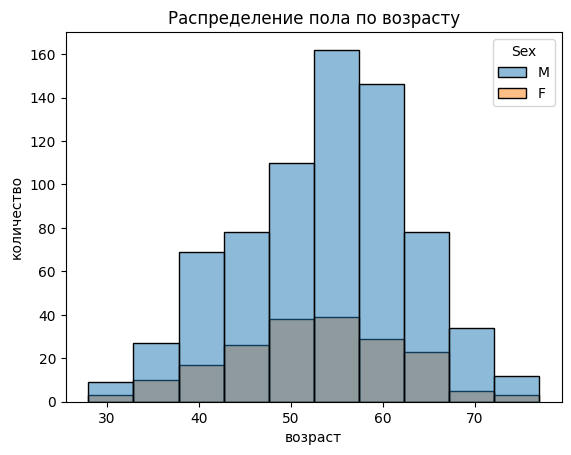

In [29]:
sns.histplot(data=df, x='Age', bins=10, hue='Sex')
plt.xlabel('возраст')
plt.ylabel('количество')
plt.title('Распределение пола по возрасту')
plt.show()

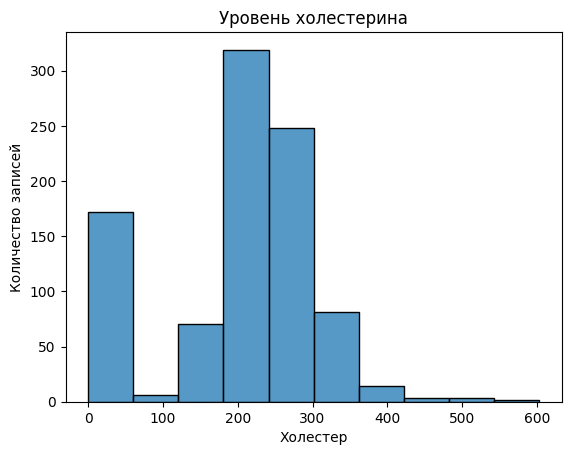

In [30]:
# проверим сколько в таблице записей о холестерине
sns.histplot(df['Cholesterol'], bins=10)
plt.xlabel('Холестер')
plt.ylabel('Количество записей')
plt.title('Уровень холестерина')
plt.show()


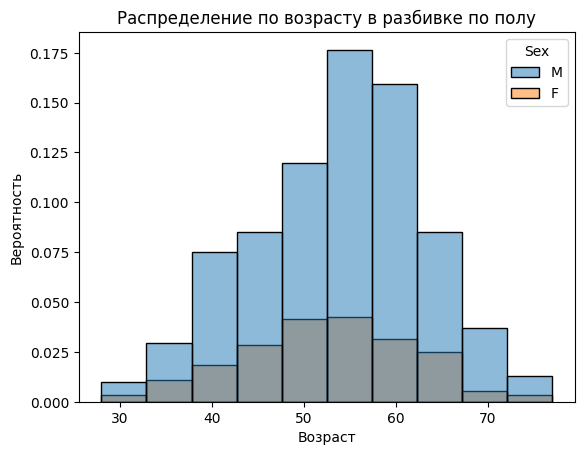

In [31]:
sns.histplot(data=df, x='Age', bins=10, hue='Sex', stat='probability')
plt.xlabel('Возраст')
plt.ylabel('Вероятность')
plt.title('Распределение по возрасту в разбивке по полу')
plt.show()

In [40]:
# Age - возраст
# Sex - пол
# ChestPainType - Тип боли в груди [TA: Типичная стенокардия,ATA: Атипичная стенокардия, NAP: Нетипичная
# стенокардия, ASY: Бессимптомная]
# RestingBP - кровяное давление в состоянии покоя [мм рт. ст.]    
# Cholesterol - холестерин в сыворотке крови [мм/дл]
# FastingBS - уровень сахара в крови натощак [1: если уровень сахара в крови > 120 мг/дл, 0: в противном случае]
# RestingECG  результаты электрокардиограммы в состоянии покоя [Нормальный: Нормальный, ST: аномалия зубца ST-T (инверсии 
# зубца T и/или подъем или понижение ST > 0,05 мВ), ГЛЖ: показывает вероятную или определенную гипертрофию
# левого желудочка по критериям Эстеса]         
# MaxHR (Max Heart Rate) - максимальная достигнутая частота сердечных сокращений [Числовое значение от 60 до 202]
# ExerciseAngina - стенокардия, в нагрузке [Y: Да, N: Нет]
# Oldpeak - депрессия ST относится к обнаружению на электрокардиограмме, при котором след в сегменте ST 
# аномально низок ниже базовой линии.
# ST_Slope - максимальная нагрузка ST [Вверх: наклон вверх, Плоский: плоский, вниз: наклон вниз
# HeartDisease - наличие сердечных заболеваний [1: сердечные заболевания, 0: норма]

In [41]:
# df = pd.DataFrame(data)

# # выбираем только числовые столбцы
# df_numeric = df.select_dtypes(include=['int', 'float'])

# # строим график box plot для числовых столбцов с использованием библиотеки Plotly Express
# # визуализируем на экран на экран с помощью метода show() это распределение данных в числовых столбцах
# fig = px.box(df_numeric)
# fig.show()

In [32]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Как построить корреляционную матрицу

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.context('seaborn');

In [9]:
import pandas as pd
import plotly.express as px

# вычисление корреляций
corr_matrix = df.corr(numeric_only=True)

# визуализация корреляционной матрицы
fig = px.imshow(corr_matrix)
fig.show()

NameError: name 'df' is not defined

In [46]:
# Более светлые оттенки цветов на ячейках матрицы представляют
# собой положительную корреляцию, а более темные оттенки, в свою
# очередь, представляют собой отрицательную корреляцию.
# На данном графике мы видим, что болезни сердца имеют высокую
# отрицательную корреляцию с "Mакс.ЧСС" и отрицательную
# корреляцию с "Холестерином", положительная корреляция с " Пиковым
# низким ST ", "голоданием" и "отдыхом".

In [37]:
# Покажем также распределение сердечных заболеваний среди мужчин и женщин.
fig=px.histogram(df, x="HeartDisease", color="Sex",
    hover_data=df.columns,
    title="Distribution of Heart Diseases",
barmode="group")
fig.show()
fig=px.histogram(df, x="ChestPainType", color="Sex",
    hover_data=df.columns,
    title="Distribution of Heart Diseases",
barmode="group")
fig.show()

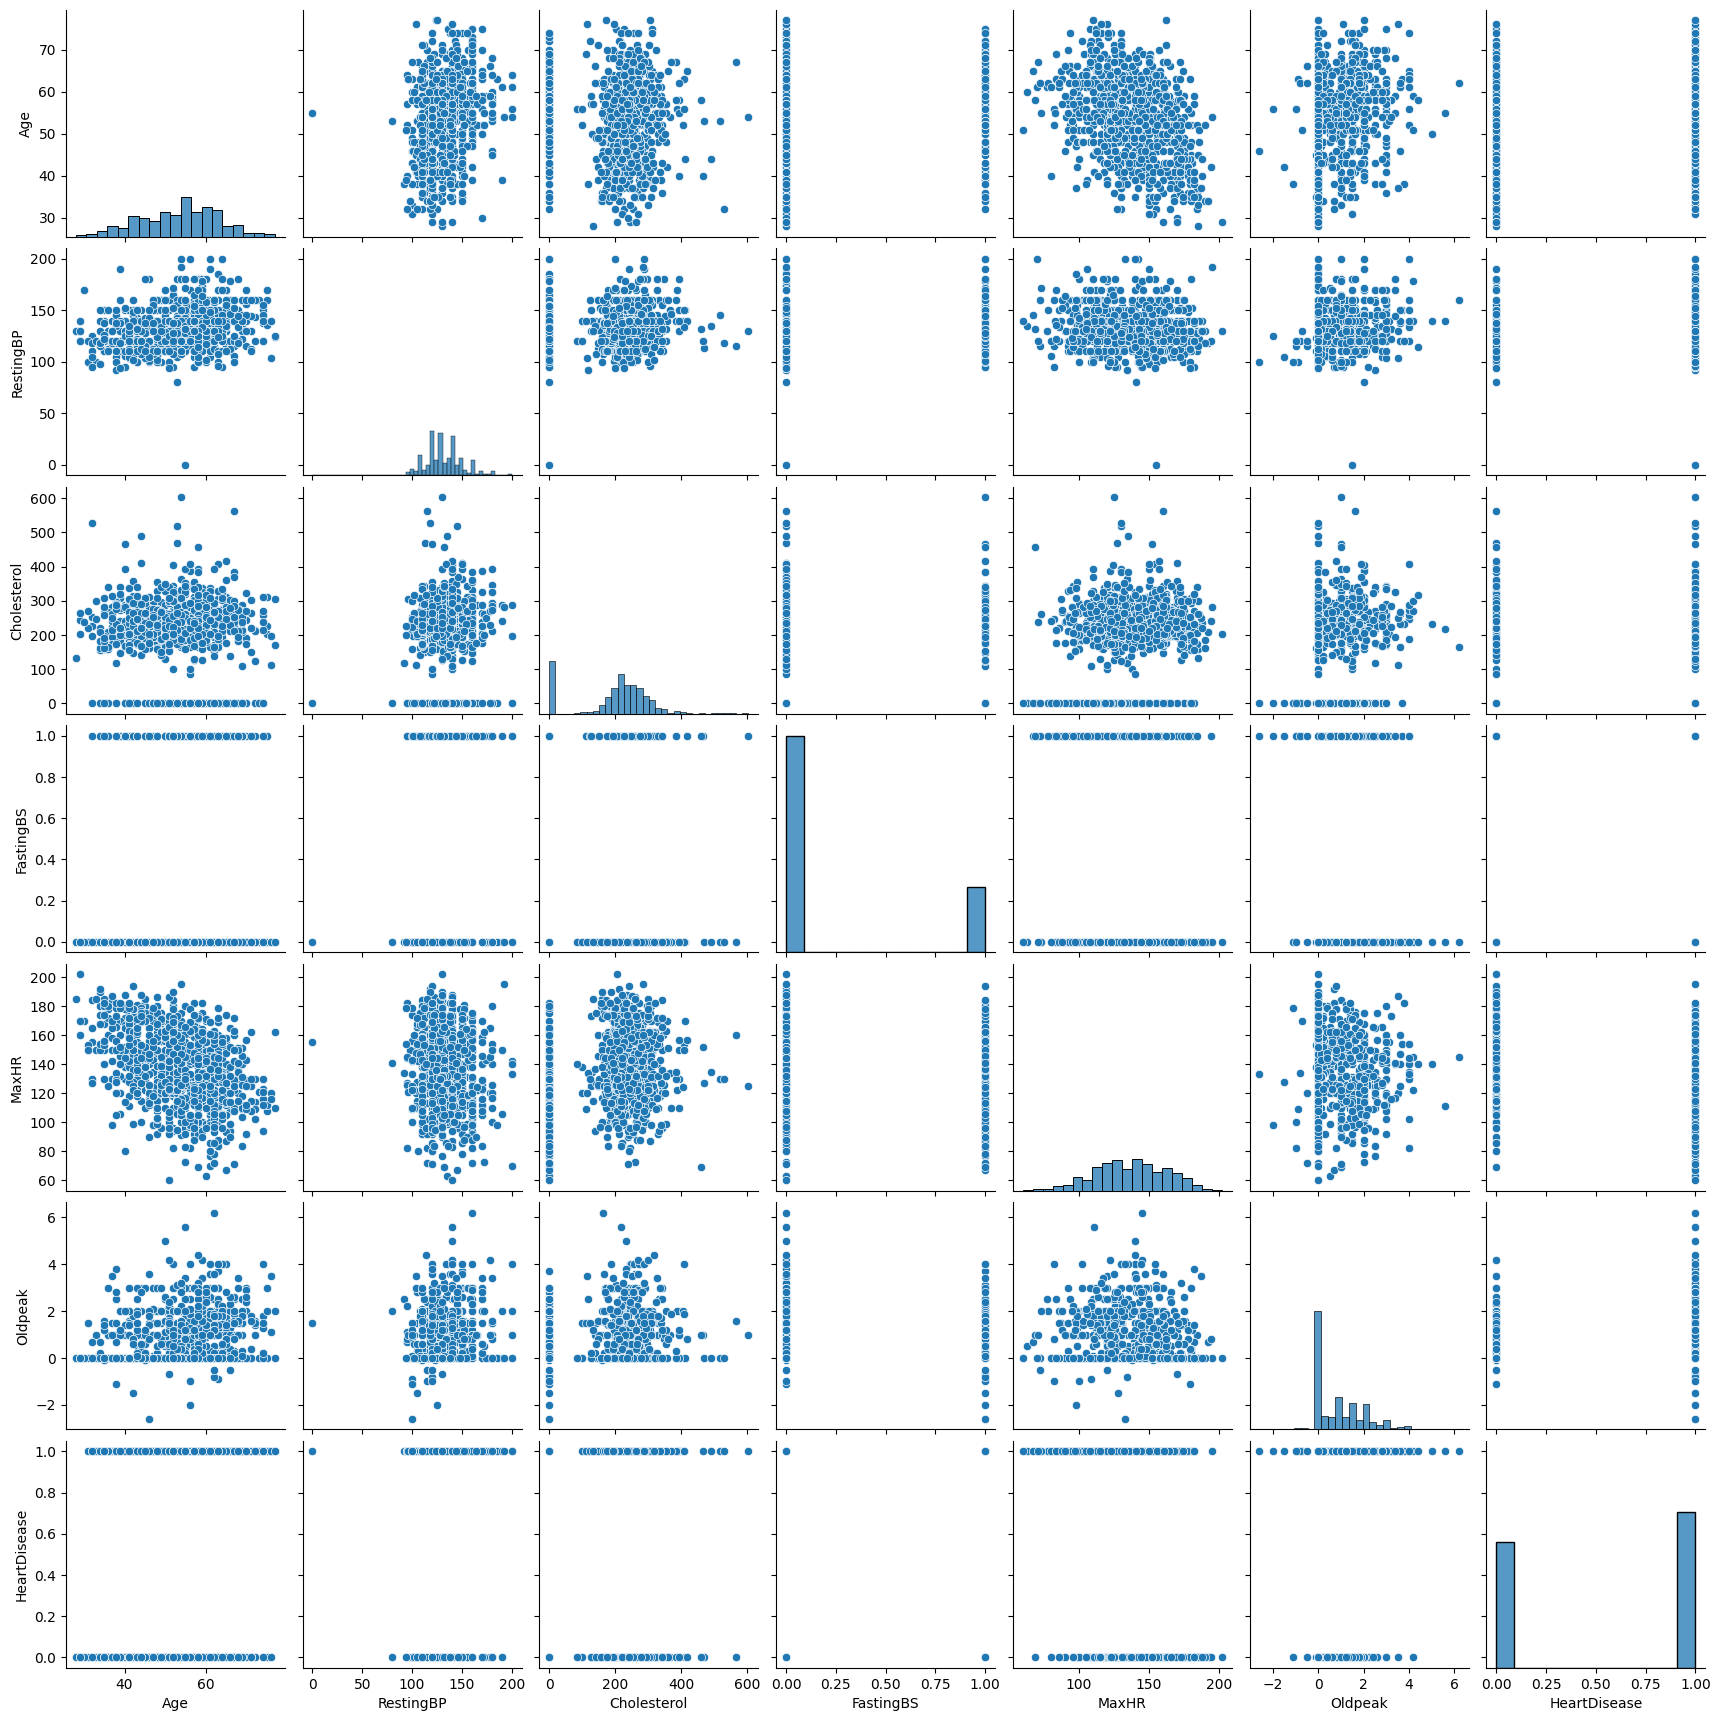

In [38]:
# Построем pair plot
sns.pairplot(df)

In [50]:
# Age - возраст
# Sex - пол
# ChestPainType - Тип боли в груди [TA: Типичная стенокардия,ATA: Атипичная стенокардия, NAP: Нетипичная
# стенокардия, ASY: Бессимптомная]
# RestingBP - кровяное давление в состоянии покоя [мм рт. ст.]    
# Cholesterol - холестерин в сыворотке крови [мм/дл]
# FastingBS - уровень сахара в крови натощак [1: если уровень сахара в крови > 120 мг/дл, 0: в противном случае]
# RestingECG  результаты электрокардиограммы в состоянии покоя [Нормальный: Нормальный, ST: аномалия зубца ST-T (инверсии 
# зубца T и/или подъем или понижение ST > 0,05 мВ), ГЛЖ: показывает вероятную или определенную гипертрофию
# левого желудочка по критериям Эстеса]         
# MaxHR (Max Heart Rate) - максимальная достигнутая частота сердечных сокращений [Числовое значение от 60 до 202]
# ExerciseAngina - стенокардия, в нагрузке [Y: Да, N: Нет]
# Oldpeak - депрессия ST относится к обнаружению на электрокардиограмме, при котором след в сегменте ST 
# аномально низок ниже базовой линии.
# ST_Slope - максимальная нагрузка ST [Вверх: наклон вверх, Плоский: плоский, вниз: наклон вниз
# HeartDisease - наличие сердечных заболеваний [1: сердечные заболевания, 0: норма]

# Как определить распределение атрибутов данных

In [57]:
# чтобы проверить линейность переменных, построим график распределения и посмотреть на асимметрию функций. 
# Оценка плотности ядра (kde) методом сглаживания данных является весьма 
# полезным инструментом для построения графика формы распределения.


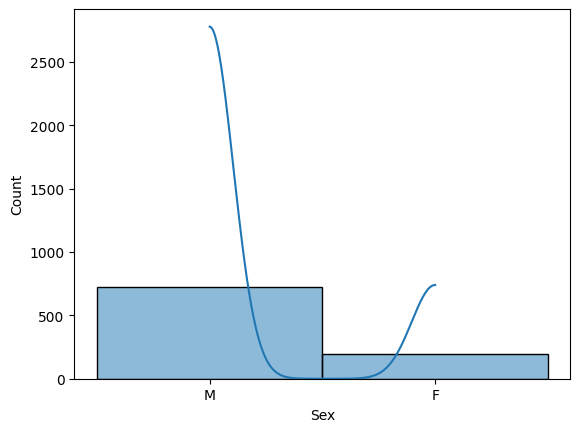

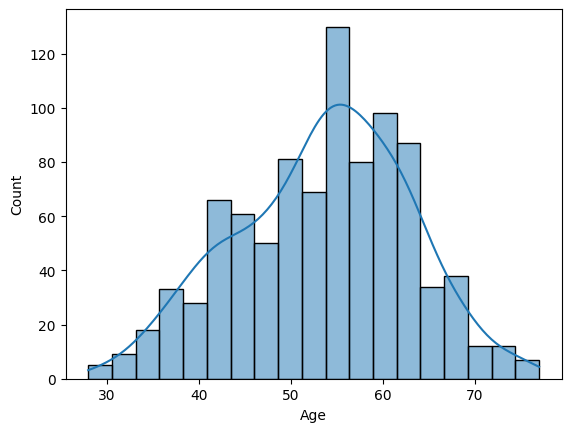

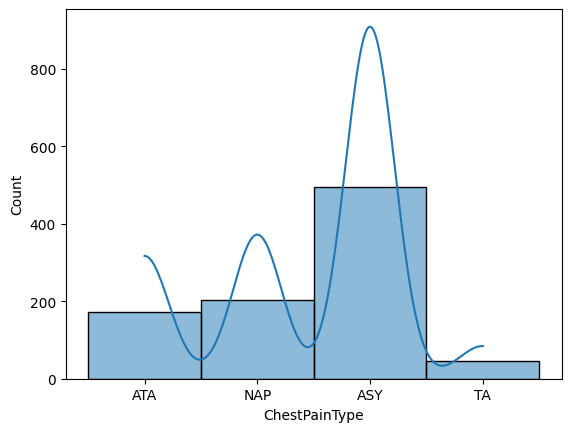

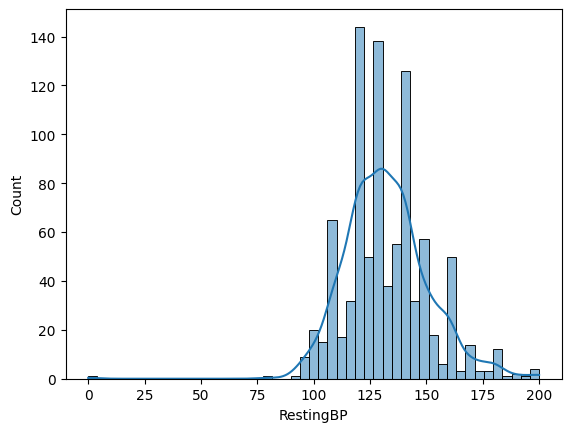

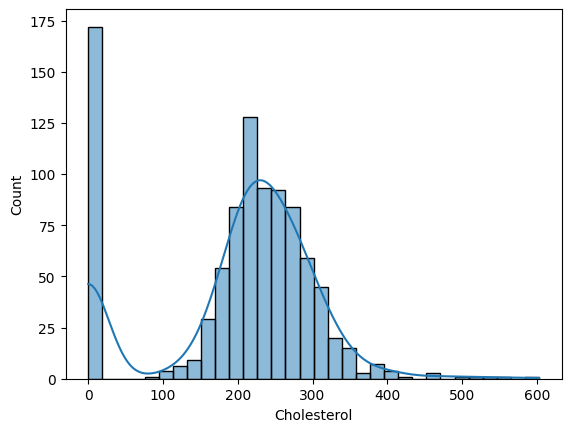

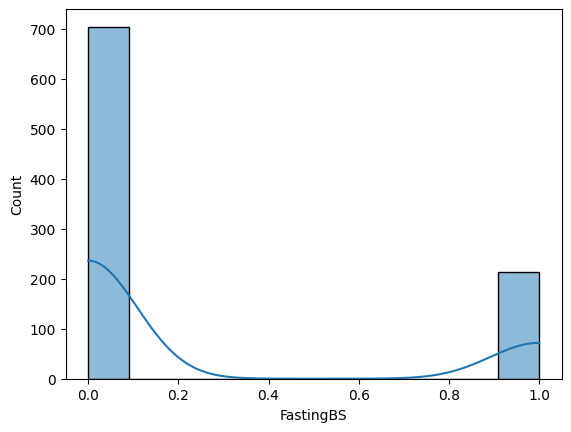

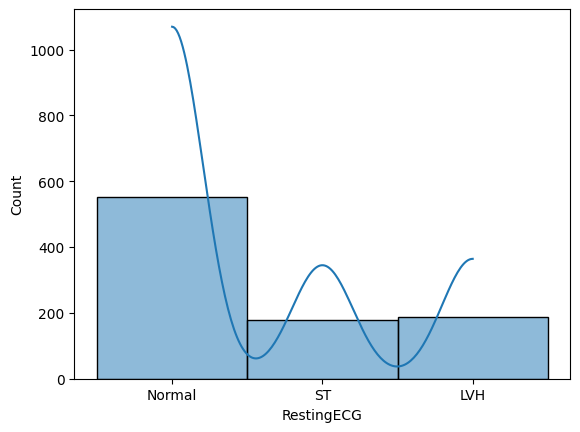

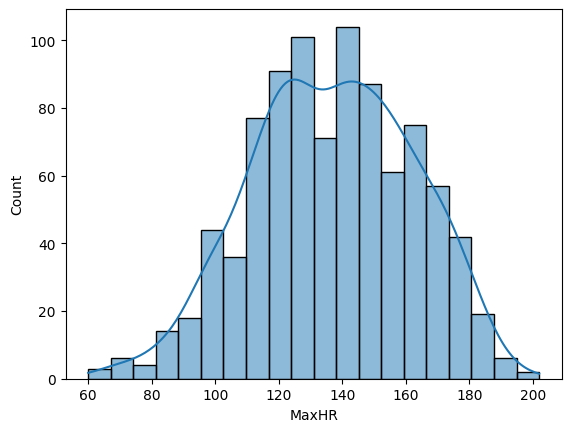

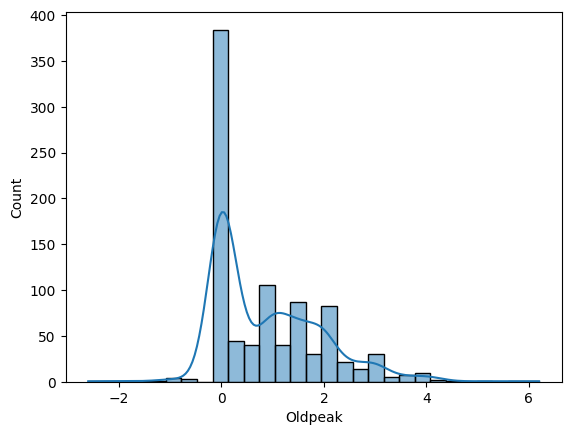

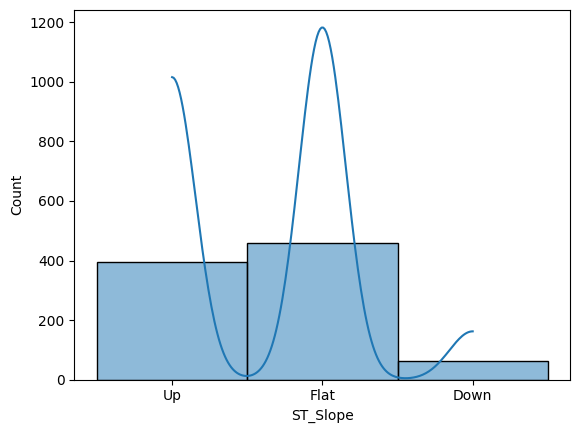

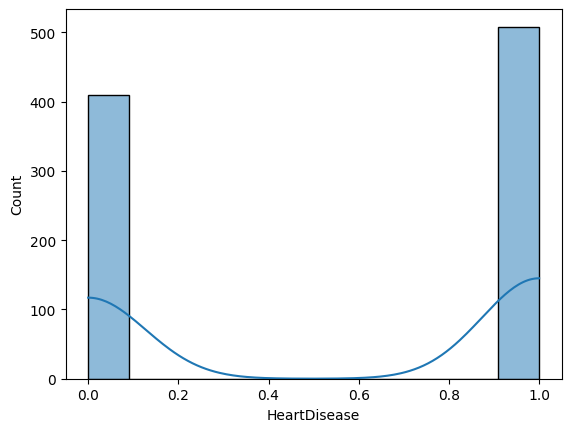

In [39]:
#Построем график распределения

sns.histplot(df_original['Sex'], kde=True)
plt.show()
sns.histplot(df_original['Age'], kde=True)
plt.show()
sns.histplot(df_original['ChestPainType'], kde=True)
plt.show()
sns.histplot(df_original['RestingBP'], kde=True)
plt.show()
sns.histplot(df_original['Cholesterol'], kde=True)
plt.show()
sns.histplot(df_original['FastingBS'], kde=True)
plt.show()
sns.histplot(df_original['RestingECG'], kde=True)
plt.show()
sns.histplot(df_original['MaxHR'], kde=True)
plt.show()
sns.histplot(df_original['Oldpeak'], kde=True)
plt.show()
sns.histplot(df_original['ST_Slope'], kde=True)
plt.show()
sns.histplot(df_original['HeartDisease'], kde=True)
plt.show()


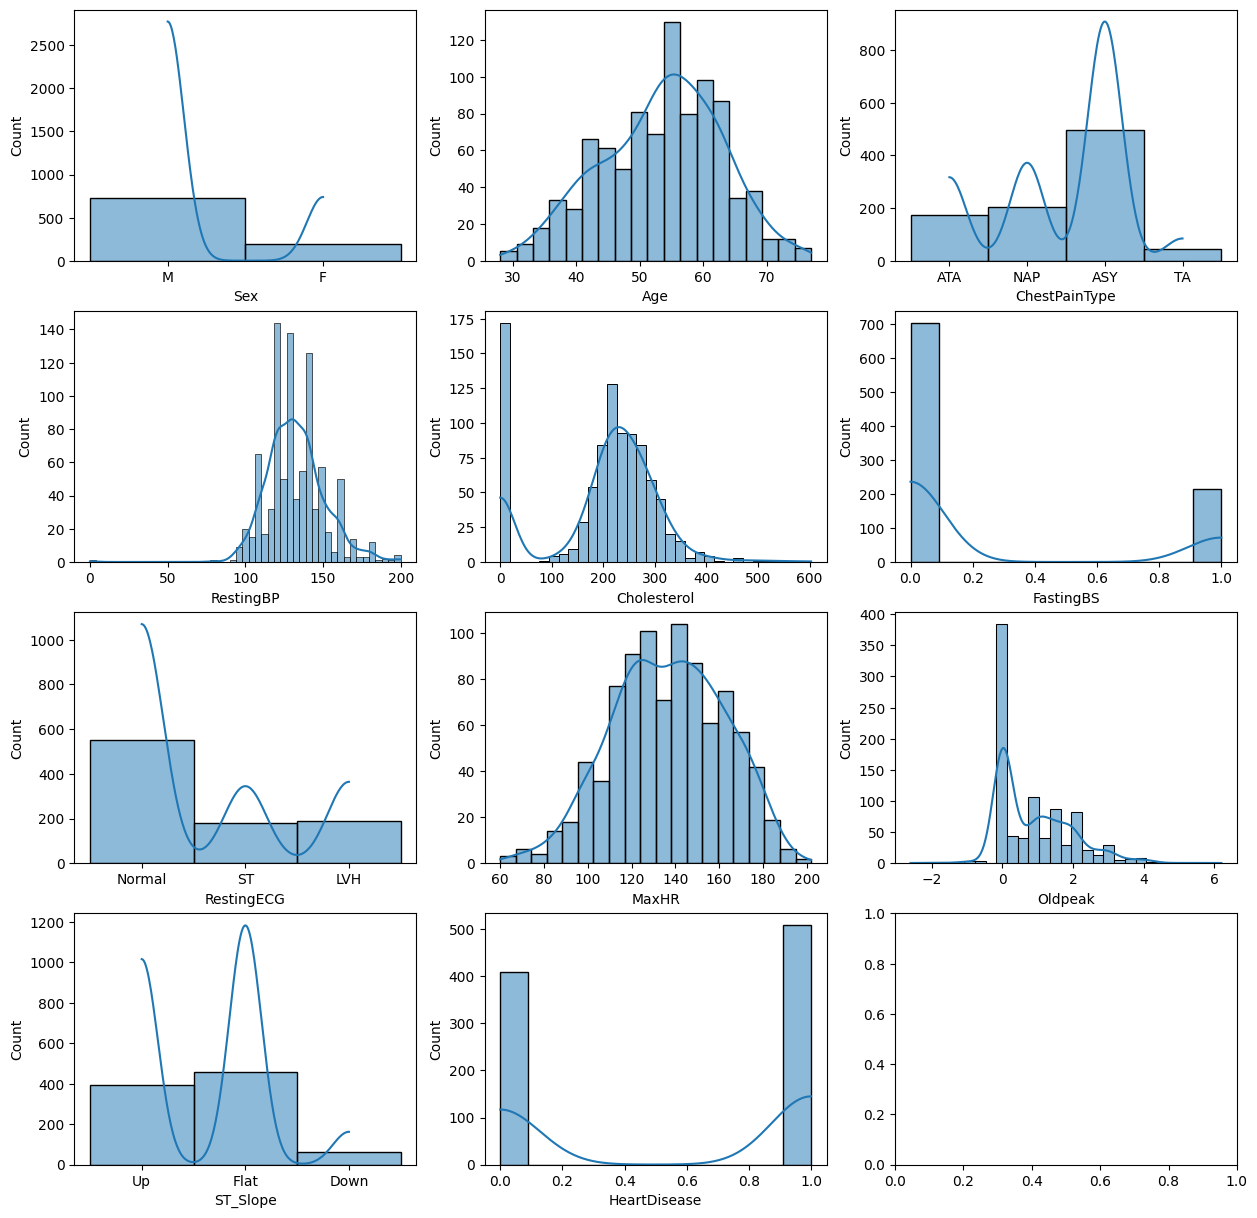

In [40]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
#  сделаем  размером 15 на 15 дюймов с сеткой из 4 строк и 3 столбцов, в каждой ячейке которой будет по одному графику. 
# Каждый график будет находиться в своей оси axs[i, j], которую можно передать в функцию sns.histplot() с 
# помощью параметра ax.
sns.histplot(df_original['Sex'], kde=True, ax=axs[0, 0])
sns.histplot(df_original['Age'], kde=True, ax=axs[0, 1])
sns.histplot(df_original['ChestPainType'], kde=True, ax=axs[0, 2])
sns.histplot(df_original['RestingBP'], kde=True, ax=axs[1, 0])
sns.histplot(df_original['Cholesterol'], kde=True, ax=axs[1, 1])
sns.histplot(df_original['FastingBS'], kde=True, ax=axs[1, 2])
sns.histplot(df_original['RestingECG'], kde=True, ax=axs[2, 0])
sns.histplot(df_original['MaxHR'], kde=True, ax=axs[2, 1])
sns.histplot(df_original['Oldpeak'], kde=True, ax=axs[2, 2])
sns.histplot(df_original['ST_Slope'], kde=True, ax=axs[3, 0])
sns.histplot(df_original['HeartDisease'], kde=True, ax=axs[3, 1])

plt.show()

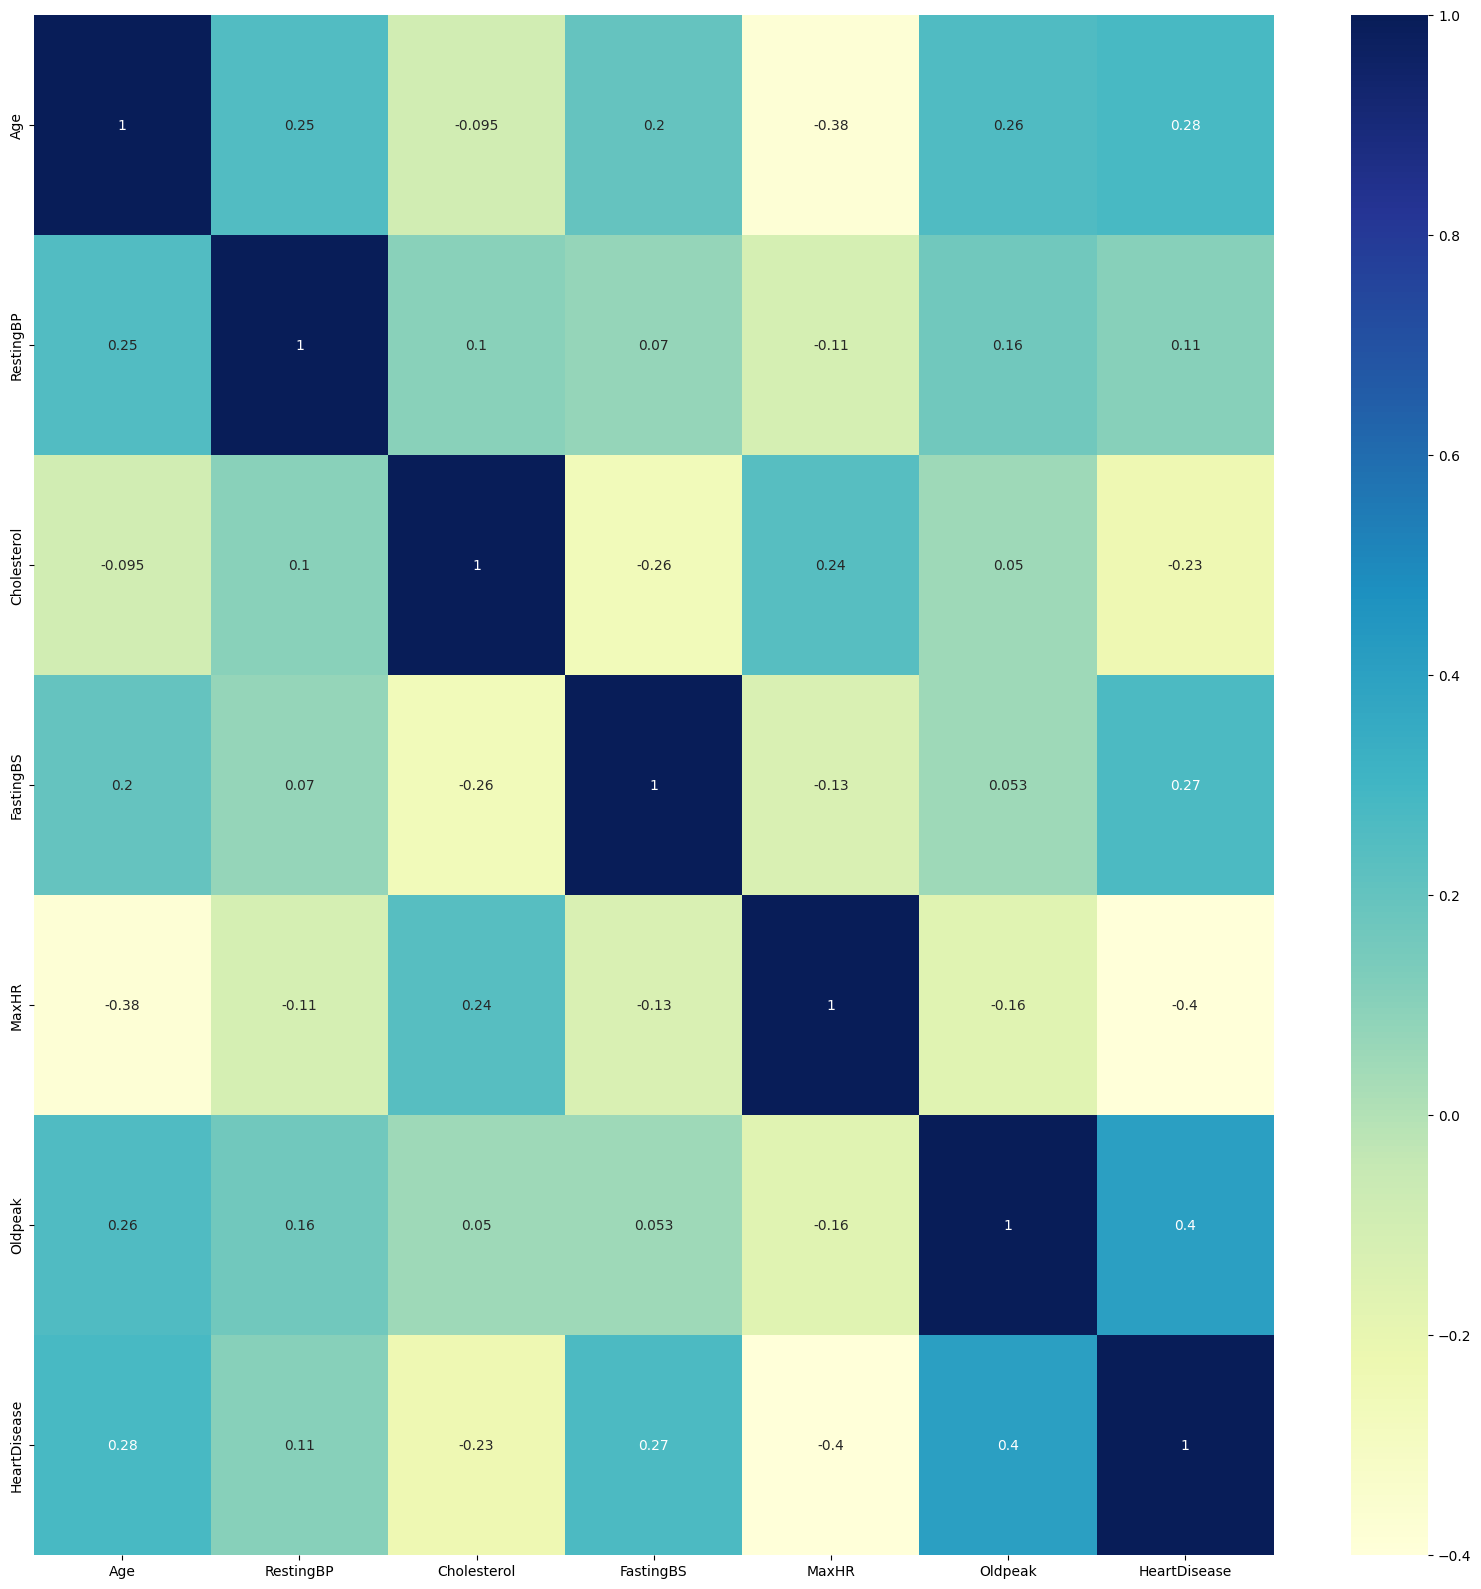

In [42]:
# создает тепловую карту (heatmap)
fig = plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap = 'YlGnBu');

In [47]:
# корреляция сприрмена (Spearman correlation)
corr = df.corr(numeric_only=True, method='spearman')
corr.style.background_gradient(cmap='coolwarm') # .set_precision(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.279390,-0.047156,0.201015,-0.365025,0.298250,0.289576
RestingBP,0.279390,1.000000,0.109481,0.066019,-0.107566,0.175313,0.113866
Cholesterol,-0.047156,0.109481,1.000000,-0.192871,0.183900,0.051723,-0.139873
FastingBS,0.201015,0.066019,-0.192871,1.000000,-0.124527,0.098968,0.267291
MaxHR,-0.365025,-0.107566,0.183900,-0.124527,1.000000,-0.205113,-0.404827
Oldpeak,0.298250,0.175313,0.051723,0.098968,-0.205113,1.000000,0.419046
HeartDisease,0.289576,0.113866,-0.139873,0.267291,-0.404827,0.419046,1.000000


Цель кейса № 2 по данным о сердечным приступах: провести полноценный анализ данных одного из реальных источников данных с помощью языка Python и библиотек для анализа данных.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
#загрузка данных
data = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [64]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [51]:
# Находим количество строк и столбцов
num_rows = data.shape[0]
num_column = data.shape[1]
print(f'Количество строк: {num_rows}, количество столбцов: {num_column}')

Количество строк: 5110, количество столбцов: 12


In [52]:

# Определим количество уникальных, нулевых + % от общего количества
df = pd.DataFrame(data.loc[:, ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']].nunique(), columns = ['UNIQUE'])
df['NULL'] = pd.DataFrame(data.loc[:, ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']].isnull().sum())
df['%NULL'] = pd.DataFrame(data.loc[:, ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']].isnull().sum()/len(data)*100)
df

,UNIQUE,NULL,%NULL
id,5110,0,0.000000
gender,3,0,0.000000
age,104,0,0.000000
hypertension,2,0,0.000000
heart_disease,2,0,0.000000
ever_married,2,0,0.000000
work_type,5,0,0.000000
Residence_type,2,0,0.000000
avg_glucose_level,3979,0,0.000000
bmi,418,201,3.933464


In [53]:
# Определим среднее, медиану, стандартное отклонение и т.д. для количественных переменных
data.loc[:,['age','avg_glucose_level','bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [54]:
# Определим тип данных для каждого столбца
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [55]:
# Удалим пустые значения
data.dropna(inplace = True)
print(data.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [56]:
# Проверим дублирование
data.duplicated().value_counts()

False    4909
Name: count, dtype: int64

In [57]:
# Найдем качественные переменные
data.describe(exclude='number')

,gender,ever_married,work_type,Residence_type,smoking_status
count,4909,4909,4909,4909,4909
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2897,3204,2811,2490,1852


gender
Female    120
Male       89
Name: count, dtype: int64
[120, 89]


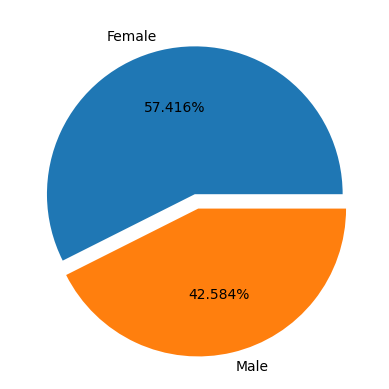

In [58]:
# Создадим графическую визуализацию данных

# Распределение по полу людей с приступами
new_data=data[data['stroke']==1]

print(new_data['gender'].value_counts())

gender_data=list(new_data['gender'].value_counts())

print(gender_data)


plt.pie(gender_data,labels=['Female','Male'],autopct='%.3f%%',explode = [0,0.1])

plt.show()

[Text(0, 0, '837'), Text(0, 0, '1852'), Text(0, 0, '737'), Text(0, 0, '1483')]

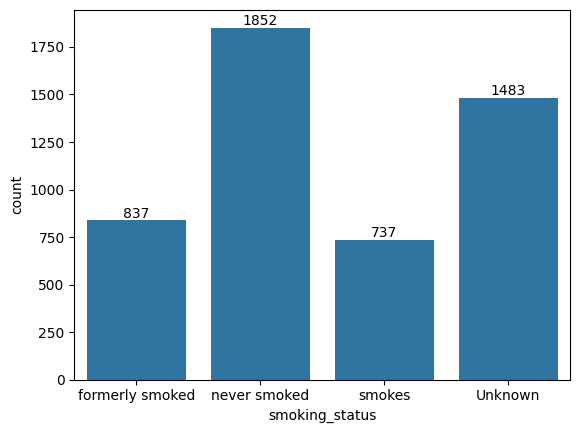

In [59]:
# Распределение по флажку "курение"
ax = sns.countplot(x='smoking_status', data=data)
ax.bar_label(ax.containers[0])

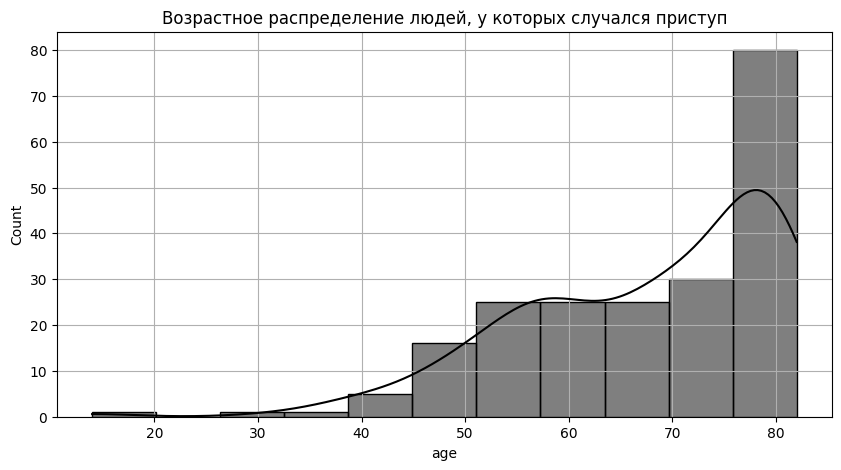

In [60]:
# Распределение по возрасту
plt.figure(figsize=(10,5))
sns.histplot(new_data['age'],kde=True,color="black")
plt.title("Возрастное распределение людей, у которых случался приступ")
plt.grid()

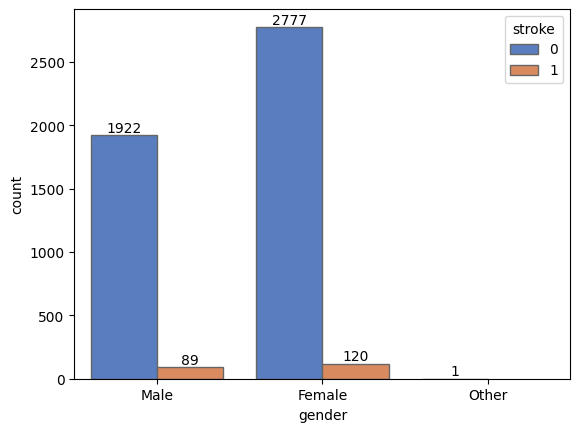

In [61]:
# Количественное соотношение людей с приступами и без по полу
ax = sns.countplot(x='gender', hue='stroke', data=data, palette='muted', edgecolor='0.4')
for container in ax.containers:
    ax.bar_label(container)


In [62]:
from scipy import stats

In [63]:
# Проверка гипотез
# нулевая гипотеза: люди более взрослого возраста больше подвержены приступам, чем молодые люди
# альтернативная: возраст не имеет существенного влияния на наличие приступов
significance_level = 0.05
old = data[data['age'] >= 50]
young = data[data['age'] < 50]
tstat, pvalue = stats.ttest_ind(a = old.dropna()['stroke'], b = young.dropna()['stroke'], alternative = 'greater', equal_var = False)
print('T-statistic value is: ', tstat)
print('P-value is: ', pvalue)

T-statistic value is:  13.116062415432678
P-value is:  2.8604160106957383e-38


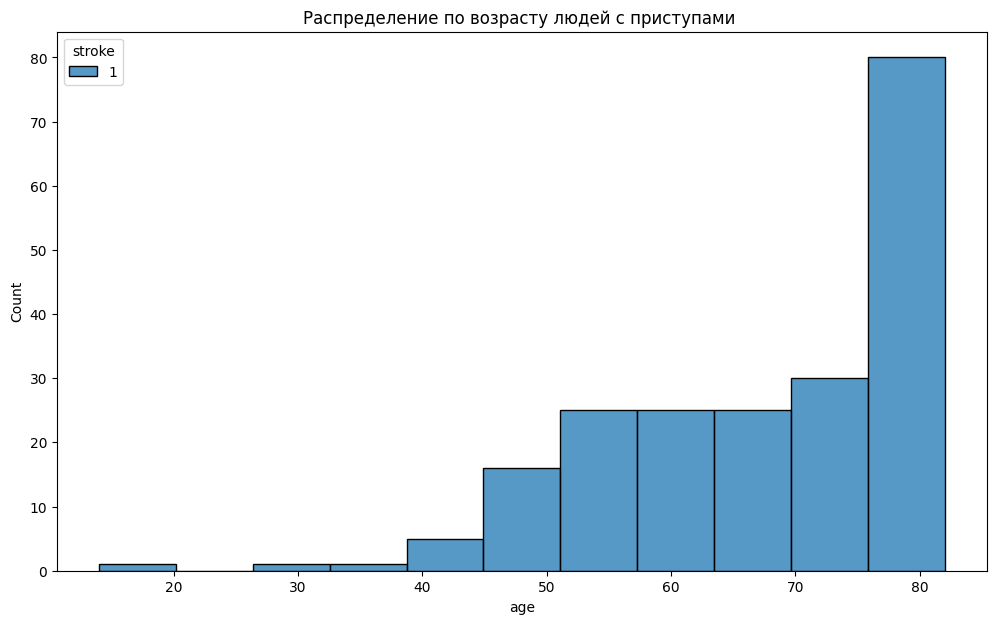

In [64]:
# визуальное подтверждение 
plt.figure(figsize=(12,7))
new_data = data[data['stroke'] == 1]
ax = sns.histplot(data=new_data, x='age', hue='stroke', multiple='stack')
plt.title('Распределение по возрасту людей с приступами ');